In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
ruta_del_archivo = 'data/Dataset_final_alquileres.csv'

# Lee el archivo xlsx y carga los datos en un DataFrame
#instalar = pip install openpyxl
df = pd.read_csv(ruta_del_archivo , sep=";")

In [5]:
df.head()

,Tipo_vivienda,Población,Precio,Superficie,Habitaciones,Baños,Precio/m²,Zonas,Zona_binaria,PMZona,PMm²Zona,RMP,RMH
0,Piso,Madrid Capital,1700.0,128.0,3,2,13.28,Tetuán,1,1975.11,18.20,17026.0,39991.0
1,Piso,Madrid Capital,1000.0,50.0,1,1,20.00,Ciudad Lineal,1,1880.77,15.97,16890.0,41311.0
2,Piso,Madrid Capital,3400.0,160.0,4,3,21.25,Salamanca,1,3710.50,26.49,25956.0,60217.0
3,Chalet,Pozuelo de Alarcón,4500.0,530.0,6,5,8.49,Pozuelo de Alarcón,0,4648.62,19.21,27167.0,86403.0
4,Casa,Madrid Capital,4250.0,461.0,3,4,9.22,Fuencarral-El Pardo,1,2432.59,14.45,20671.0,55125.0


In [6]:
df.dtypes

Tipo_vivienda     object
Población         object
Precio           float64
Superficie       float64
Habitaciones       int64
Baños              int64
Precio/m²        float64
Zonas             object
Zona_binaria       int64
PMZona           float64
PMm²Zona         float64
RMP              float64
RMH              float64
dtype: object

### Probando con Tipos de viviendas

In [7]:
arbol = pd.read_csv(ruta_del_archivo , sep=";")
arbol.head()

,Tipo_vivienda,Población,Precio,Superficie,Habitaciones,Baños,Precio/m²,Zonas,Zona_binaria,PMZona,PMm²Zona,RMP,RMH
0,Piso,Madrid Capital,1700.0,128.0,3,2,13.28,Tetuán,1,1975.11,18.20,17026.0,39991.0
1,Piso,Madrid Capital,1000.0,50.0,1,1,20.00,Ciudad Lineal,1,1880.77,15.97,16890.0,41311.0
2,Piso,Madrid Capital,3400.0,160.0,4,3,21.25,Salamanca,1,3710.50,26.49,25956.0,60217.0
3,Chalet,Pozuelo de Alarcón,4500.0,530.0,6,5,8.49,Pozuelo de Alarcón,0,4648.62,19.21,27167.0,86403.0
4,Casa,Madrid Capital,4250.0,461.0,3,4,9.22,Fuencarral-El Pardo,1,2432.59,14.45,20671.0,55125.0


In [8]:
arbol["Tipo_vivienda"].unique()

array(['Piso', 'Chalet', 'Casa'], dtype=object)

In [10]:
#Tenemos que transformar el tipo de vivienda a numerico
# Import label encoder 
from sklearn import preprocessing
#label_encoder sabe cómo entender las etiquetas de las palabras.
label_encoder = preprocessing.LabelEncoder()
#Codificar etiquetas en columna
arbol["Tipo_vivienda"]= label_encoder.fit_transform(arbol["Tipo_vivienda"])

In [ ]:
arbol["Tipo_vivienda"].unique()
#2 Piso
#1 Chalet
#0 Casa

array([2, 1, 0])

In [ ]:
#Ahora escogemos las columnas que vamos a utilizar
arbol.head(5)

,Tipo_vivienda,Población,Precio,Superficie,Habitaciones,Baños,Precio/m²,Zonas,Zona_binaria,PMZona,PMm²Zona,RMP,RMH
0,2,Madrid Capital,1700.0,128.0,3,2,13.28,Tetuán,1,1975.11,18.20,17026.0,39991.0
1,2,Madrid Capital,1000.0,50.0,1,1,20.00,Ciudad Lineal,1,1880.77,15.97,16890.0,41311.0
2,2,Madrid Capital,3400.0,160.0,4,3,21.25,Salamanca,1,3710.50,26.49,25956.0,60217.0
3,1,Pozuelo de Alarcón,4500.0,530.0,6,5,8.49,Pozuelo de Alarcón,0,4648.62,19.21,27167.0,86403.0
4,0,Madrid Capital,4250.0,461.0,3,4,9.22,Fuencarral-El Pardo,1,2432.59,14.45,20671.0,55125.0


In [ ]:
prueba_arbol = arbol[["Tipo_vivienda", "Superficie", "Precio", "Habitaciones" ,"Baños"]]
prueba_arbol.head()

,Tipo_vivienda,Superficie,Precio,Habitaciones,Baños
0,2,128.0,1700.0,3,2
1,2,50.0,1000.0,1,1
2,2,160.0,3400.0,4,3
3,1,530.0,4500.0,6,5
4,0,461.0,4250.0,3,4


In [ ]:
feature_cols = ["Superficie", "Precio", "Habitaciones" ,"Baños"]
X = prueba_arbol[feature_cols]
y = prueba_arbol['Tipo_vivienda']

In [ ]:
print(X)

      Superficie  Precio  Habitaciones  Baños
0          128.0  1700.0             3      2
1           50.0  1000.0             1      1
2          160.0  3400.0             4      3
3          530.0  4500.0             6      5
4          461.0  4250.0             3      4
...          ...     ...           ...    ...
1525        62.0  2000.0             1      1
1526        65.0  1080.0             2      1
1527        81.0  1500.0             2      2
1528        70.0  1000.0             2      1
1529        40.0  1200.0             2      1

[1530 rows x 4 columns]


In [ ]:
print(y)

0       2
1       2
2       2
3       1
4       0
       ..
1525    2
1526    2
1527    2
1528    2
1529    2
Name: Tipo_vivienda, Length: 1530, dtype: int32


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
# crear arbol de decision
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifier object using entropy
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifier
clf_entropy = clf_entropy.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf_entropy.predict(X_test)

#Para la prueba de tabla de mas abajo
y_train_pred = clf_entropy.predict(X_train)


print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Accuracy:", metrics.accuracy_score(y_train,y_train_pred))



Accuracy: 0.8779956427015251
Accuracy: 0.8991596638655462


### Árbol de desicion (Con tipo de vivienda)

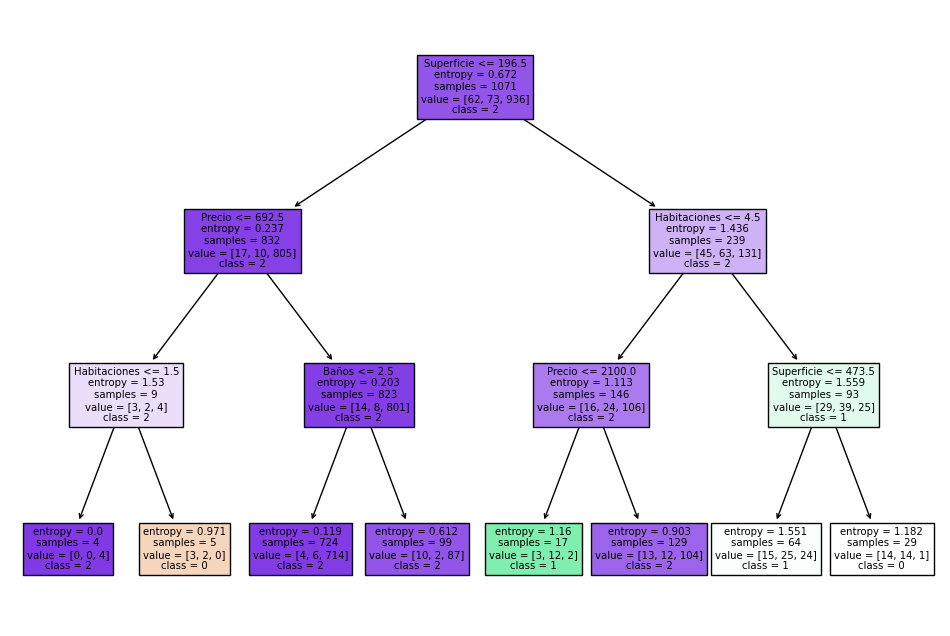

Accuracy: 0.8779956427015251
MAE: 0.1437908496732026
MSE: 0.18736383442265794
RMSE: 0.43285544287054767
R2 SCORE: 0.23695198329853862
MAPE: inf


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Convertir las etiquetas de clase a cadenas si es necesario
class_names_str = [str(class_) for class_ in clf_entropy.classes_]

# Visualizar el árbol de decisión directamente en la salida del código
plt.figure(figsize=(12, 8))
plot_tree(clf_entropy, filled=True, feature_names=feature_cols, class_names=class_names_str)
plt.show()

# Evaluar la precisión del modelo
y_pred = clf_entropy.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Calcular MAE, MSE, RMSE, R2 SCORE y MAPE
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

# Calcular MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Mostrar las métricas
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 SCORE: {r2}')
print(f'MAPE: {mape}')


MAE: 0.1437908496732026
MSE: 0.18736383442265794
RMSE: 0.43285544287054767
R2 SCORE: 0.23695198329853862
MAPE: inf


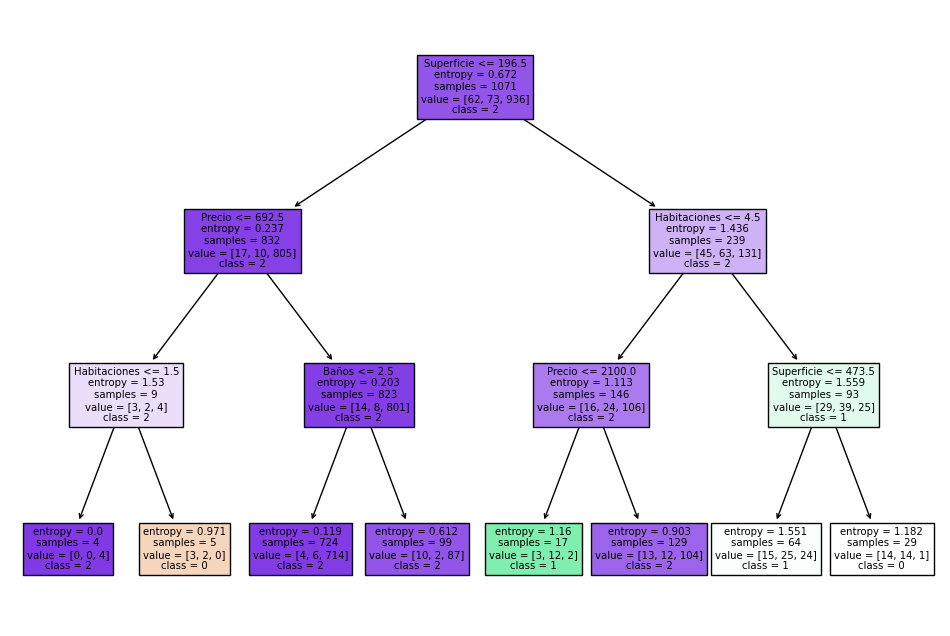

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

# Definir las columnas de características y la variable objetivo
feature_cols = ["Superficie", "Precio", "Habitaciones", "Baños"]
X = prueba_arbol[feature_cols]
y = prueba_arbol['Tipo_vivienda']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el clasificador de árbol de decisión
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_entropy = clf_entropy.fit(X_train, y_train)

# Predecir la respuesta para el conjunto de prueba
y_pred = clf_entropy.predict(X_test)

# Calcular MAE, MSE, RMSE, R2 SCORE y MAPE
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

# Calcular MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Mostrar las métricas
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2 SCORE: {r2}')
print(f'MAPE: {mape}')

# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(clf_entropy, filled=True, feature_names=feature_cols, class_names=class_names_str)
plt.show()

In [ ]:
# Predecir las respuestas para los conjuntos de entrenamiento y prueba
y_train_pred = clf_entropy.predict(X_train)
y_test_pred = clf_entropy.predict(X_test)

# Calcular métricas para TRAIN
mae_train = metrics.mean_absolute_error(y_train, y_train_pred)
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = metrics.r2_score(y_train, y_train_pred)
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Calcular métricas para TEST
mae_test = metrics.mean_absolute_error(y_test, y_test_pred)
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = metrics.r2_score(y_test, y_test_pred)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Calcular las diferencias
mae_diff = mae_train - mae_test
mse_diff = mse_train - mse_test
rmse_diff = rmse_train - rmse_test
r2_diff = r2_train - r2_test
mape_diff = mape_train - mape_test

# DataFrame con los resultados
data = {
    'MAE_TRAIN': [mae_train],
    'MSE_TRAIN': [mse_train],
    'RMSE_TRAIN': [rmse_train],
    'R2_TRAIN': [r2_train],
    'MAPE_TRAIN': [mape_train],
    
    'MAE_TEST': [mae_test],
    'MSE_TEST': [mse_test],
    'RMSE_TEST': [rmse_test],
    'R2_TEST': [r2_test],
    'MAPE_TEST': [mape_test],
    
    'MAE_DIFF': [mae_diff],
    'MSE_DIFF': [mse_diff],
    'RMSE_DIFF': [rmse_diff],
    'R2_DIFF': [r2_diff],
    'MAPE_DIFF': [mape_diff]
}
df_results = pd.DataFrame(data)
df_results



C:\Users\TIGER\AppData\Local\Temp\ipykernel_12688\3907738457.py:24: RuntimeWarning: invalid value encountered in scalar subtract
  mape_diff = mape_train - mape_test


,MAE_TRAIN,MSE_TRAIN,RMSE_TRAIN,R2_TRAIN,MAPE_TRAIN,MAE_TEST,MSE_TEST,RMSE_TEST,R2_TEST,MAPE_TEST,MAE_DIFF,MSE_DIFF,RMSE_DIFF,R2_DIFF,MAPE_DIFF
0,0.126984,0.179272,0.423405,0.325757,inf,0.143791,0.187364,0.432855,0.236952,inf,-0.016807,-0.008092,-0.009451,0.088805,NaN


### Regresion lineal polinomica (Con precio)

In [ ]:
rlp = pd.read_csv(ruta_del_archivo , sep=";")
rlp.head()

,Tipo_vivienda,Población,Precio,Superficie,Habitaciones,Baños,Precio/m²,Zonas,Zona_binaria,PMZona,PMm²Zona,RMP,RMH
0,Piso,Madrid Capital,1700.0,128.0,3,2,13.28,Tetuán,1,1975.11,18.20,17026.0,39991.0
1,Piso,Madrid Capital,1000.0,50.0,1,1,20.00,Ciudad Lineal,1,1880.77,15.97,16890.0,41311.0
2,Piso,Madrid Capital,3400.0,160.0,4,3,21.25,Salamanca,1,3710.50,26.49,25956.0,60217.0
3,Chalet,Pozuelo de Alarcón,4500.0,530.0,6,5,8.49,Pozuelo de Alarcón,0,4648.62,19.21,27167.0,86403.0
4,Casa,Madrid Capital,4250.0,461.0,3,4,9.22,Fuencarral-El Pardo,1,2432.59,14.45,20671.0,55125.0


In [ ]:
feature_cols = ["Superficie", "Habitaciones" ,"Baños"]
X = prueba_arbol[feature_cols]
y = prueba_arbol['Precio']

In [ ]:
print(X)
print("*"*32)
print(y)

      Superficie  Habitaciones  Baños
0          128.0             3      2
1           50.0             1      1
2          160.0             4      3
3          530.0             6      5
4          461.0             3      4
...          ...           ...    ...
1525        62.0             1      1
1526        65.0             2      1
1527        81.0             2      2
1528        70.0             2      1
1529        40.0             2      1

[1530 rows x 3 columns]
********************************
0       1700.0
1       1000.0
2       3400.0
3       4500.0
4       4250.0
         ...  
1525    2000.0
1526    1080.0
1527    1500.0
1528    1000.0
1529    1200.0
Name: Precio, Length: 1530, dtype: float64


MSE Train: 1535824.178956149
MSE Test: 1951454.4850647931
R2 Train: 0.642829857037399
R2 Test: 0.6280431293278749


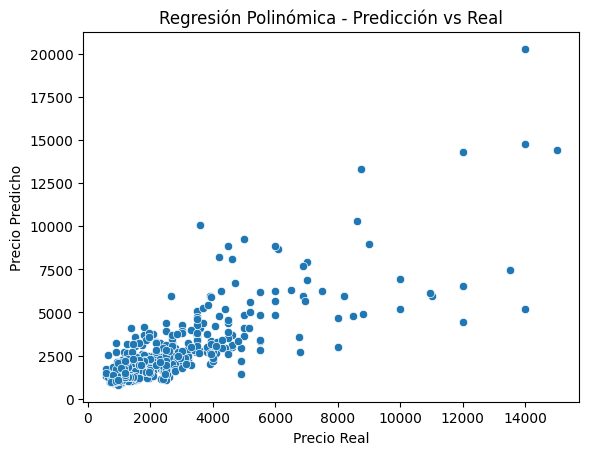

In [ ]:
# Si tu objetivo principal es la predicción de precios, entonces puedes centrarte en la interpretación del MSE 
# y el R² para evaluar la precisión de tu modelo de regresión polinómica en la predicción de valores continuos.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Definir las columnas de características y la variable objetivo
feature_cols = ["Superficie", "Habitaciones", "Baños"]
X = prueba_arbol[feature_cols]
y = prueba_arbol['Precio']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Grado del polinomio
degree = 2  # Puedes ajustar el grado según tus necesidades

# Crear características polinómicas
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Crear y entrenar el modelo de regresión lineal polinómica
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predecir en los conjuntos de prueba y entrenamiento
y_train_pred = poly_model.predict(X_train_poly)
y_test_pred = poly_model.predict(X_test_poly)

# Calcular métricas

# En problemas de regresión, como el que estás tratando, se suelen utilizar métricas como el error cuadrático medio (MSE),
# el coeficiente de determinación (R²) u otras métricas específicas para evaluar la precisión del modelo en la 
# predicción de valores continuos.

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Imprimir métricas
print(f'MSE Train: {mse_train}')
print(f'MSE Test: {mse_test}')
print(f'R2 Train: {r2_train}')
print(f'R2 Test: {r2_test}')

# # Visualizar la regresión polinómica
# plt.scatter(X_test['Superficie'], y_test, color='black', label='Real')
# plt.scatter(X_test['Superficie'], y_test_pred, color='blue', label='Predicción')
# plt.title('Regresión Polinómica')
# plt.xlabel('Superficie')
# plt.ylabel('Precio')
# plt.legend()
# plt.show()

# Crear un DataFrame para visualizar los resultados
df_results = pd.DataFrame({
    'Actual': y_test,
    'Predicción': y_test_pred
})

# Visualizar la regresión polinómica utilizando Seaborn
sns.scatterplot(data=df_results, x='Actual', y='Predicción')
plt.title('Regresión Polinómica - Predicción vs Real')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.show()

### Regresion de Bosque (Random Forest Regression) con Precio

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
arbol = pd.read_csv(ruta_del_archivo , sep=";")
arbol.head()

,Tipo_vivienda,Población,Precio,Superficie,Habitaciones,Baños,Precio/m²,Zonas,Zona_binaria,PMZona,PMm²Zona,RMP,RMH
0,Piso,Madrid Capital,1700.0,128.0,3,2,13.28,Tetuán,1,1975.11,18.20,17026.0,39991.0
1,Piso,Madrid Capital,1000.0,50.0,1,1,20.00,Ciudad Lineal,1,1880.77,15.97,16890.0,41311.0
2,Piso,Madrid Capital,3400.0,160.0,4,3,21.25,Salamanca,1,3710.50,26.49,25956.0,60217.0
3,Chalet,Pozuelo de Alarcón,4500.0,530.0,6,5,8.49,Pozuelo de Alarcón,0,4648.62,19.21,27167.0,86403.0
4,Casa,Madrid Capital,4250.0,461.0,3,4,9.22,Fuencarral-El Pardo,1,2432.59,14.45,20671.0,55125.0


In [ ]:
prueba_rforest = arbol[["Superficie", "Habitaciones", "Baños", "Precio"]]

In [ ]:
# Definir las columnas de características y la variable objetivo
feature_cols =  ["Superficie", "Habitaciones", "Baños"]
X = prueba_rforest[feature_cols]
y = prueba_rforest['Precio']

In [ ]:
X

,Superficie,Habitaciones,Baños
0,128.0,3,2
1,50.0,1,1
2,160.0,4,3
3,530.0,6,5
4,461.0,3,4
...,...,...,...
1525,62.0,1,1
1526,65.0,2,1
1527,81.0,2,2
1528,70.0,2,1


In [ ]:
y

0       1700.0
1       1000.0
2       3400.0
3       4500.0
4       4250.0
         ...  
1525    2000.0
1526    1080.0
1527    1500.0
1528    1000.0
1529    1200.0
Name: Precio, Length: 1530, dtype: float64

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 30% de test 

# Crear y entrenar el modelo de regresión Random Forest
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [ ]:
# Predecir en los conjuntos de prueba y entrenamiento
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [ ]:
# Calcular métricas
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

In [ ]:
# Imprimir métricas
print(f'MSE Train: {mse_train}')
print(f'MSE Test: {mse_test}')
print(f'R2 Train: {r2_train}')
print(f'R2 Test: {r2_test}')

MSE Train: 519392.91639629245
MSE Test: 1913788.9346397386
R2 Train: 0.879210364867994
R2 Test: 0.6352223694154454


In [ ]:
# Crear un DataFrame para visualizar los resultados
df_results = pd.DataFrame({
    'Actual': y_test,
    'Predicción': y_test_pred
})

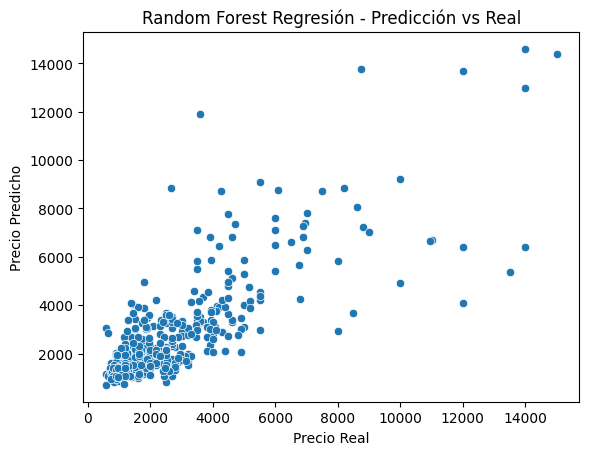

In [ ]:
# Visualizar la regresión Random Forest utilizando Seaborn
sns.scatterplot(data=df_results, x='Actual', y='Predicción')
plt.title('Random Forest Regresión - Predicción vs Real')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.show()

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor
# Crear y entrenar el modelo de regresión Random Forest
rf_model = RandomForestRegressor(n_estimators=5, random_state=42)
rf_model.fit(X, y)

# Seleccionar un árbol individual del Random Forest (por ejemplo, el primer árbol)
tree_index = 0
tree = rf_model.estimators_[tree_index]

# Exportar el árbol a formato DOT
dot_data = export_graphviz(tree, out_file=None, feature_names=feature_cols, filled=True, rounded=True, special_characters=True)

# Visualizar el árbol con Graphviz
graph = graphviz.Source(dot_data)
graph.render("random_forest_tree")  # Esto guardará el árbol como un archivo PDF llamado "random_forest_tree.pdf"
graph.view("random_forest_tree")    # Esto abrirá el archivo PDF con el visor de PDF predeterminado

'random_forest_tree.pdf'

### Regresion lineal (Con precio)

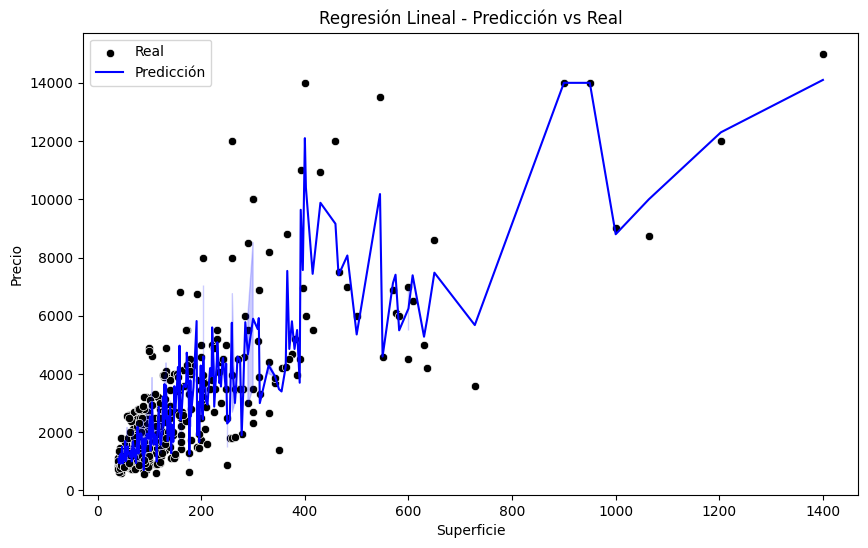

MSE Train: 633622.9568996291
MSE Test: 598531.608479785
R2 Train: 0.852645110552926
R2 Test: 0.8859169169497167


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Definir las columnas de características y la variable objetivo
feature_cols = ["Superficie", "Habitaciones", "Baños"]
X = prueba_arbol[feature_cols]
y = prueba_arbol['Precio']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Visualizar la regresión lineal utilizando Seaborn
plt.figure(figsize=(10, 6))

# Scatter plot de datos reales
sns.scatterplot(x=X_test['Superficie'], y=y_test, color='black', label='Real')

# Línea de regresión
sns.lineplot(x=X_test['Superficie'], y=y_test_pred, color='blue', label='Predicción')

plt.title('Regresión Lineal - Predicción vs Real')
plt.xlabel('Superficie')
plt.ylabel('Precio')
plt.legend()
plt.show()

# Calcular métricas
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Imprimir métricas
print(f'MSE Train: {mse_train}')
print(f'MSE Test: {mse_test}')
print(f'R2 Train: {r2_train}')
print(f'R2 Test: {r2_test}')

# Otros 

### RandomForestRegresion